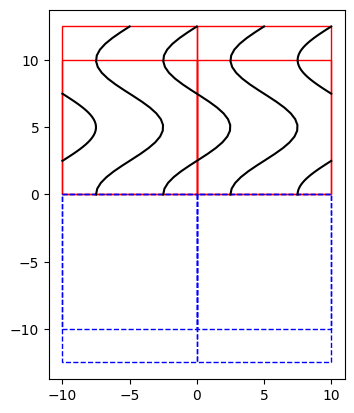

In [1]:
from matplotlib import pyplot as plt
import numpy as np


def rectangle(x, y, width, height, color,linestyle="-"):
    plt.fill([x, x, x + width, x + width], 
             [y, y + height, y + height, y], color="None", edgecolor=color, linestyle=linestyle)

lx = 10 

rectangle(0,   0,  lx,  10  , 'red')
rectangle(0,   0, -lx,  10  , 'red')
rectangle(0,   0,  lx, 12.5 , 'red')
rectangle(0,   0, -lx, 12.5 , 'red')



rectangle(0,   0,  lx,  -10  , 'blue',linestyle="--")
rectangle(0,   0, -lx,  -10  , 'blue',linestyle="--")
rectangle(0,   0,  lx, -12.5 , 'blue',linestyle="--")
rectangle(0,   0, -lx, -12.5 , 'blue',linestyle="--")
# aspect ratio

R = 10/4
T = 10

t1 = np.linspace(0, 1, 30)

# =============================================================================
def fparams(t,y0):
    y = 12.5*t
    x = -R*np.cos(2*np.pi*y/T) + y0
    return x,y

x1,y1 = fparams(t1,-4*R)

y1 = t1*2*R + R
x1 = -R*np.cos(2*np.pi*y1/T) - 4*R

plt.plot(x1,y1, 'k')

x2,y2 = fparams(t1,-2*R)
plt.plot(x2,y2, 'k')

x3,y3 = fparams(t1,0)
plt.plot(x3,y3, 'k')

x3,y3 = fparams(t1,2*R)
plt.plot(x3,y3, 'k')

y4 = t1*R 
x4 = -R*np.cos(2*np.pi*y4/T) + 4*R
plt.plot(x4,y4, 'k')

y5 = t1*2*R + 3*R
x5 = -R*np.cos(2*np.pi*y5/T) + 4*R
plt.plot(x5,y5, 'k')


# =============================================================================


plt.gca().set_aspect('equal', adjustable='box')

In [2]:
import gmsh
import numpy as np
from gmshtools.CreateYarnRect import CreateYarnRect

In [3]:
gmsh.initialize()
trajs = np.array([[x1[i],y1[i],0] for i in range(len(x1))])
yarn = CreateYarnRect({"trajs":trajs, 
                "radius":0.3, 
                "factor_radius":2.2, 
                "density":5,
                "vec_init":[1,0,0],
                "vec_end" :[-1,0,0],
                "skip":5})

gmsh.model.occ.synchronize()
gmsh.fltk.run()

In [4]:
ph = gmsh.model.addPhysicalGroup(3, [yarn["volumes"][0][1]])
gmsh.model.setPhysicalName(3, ph, "Yarn")
gmsh.model.occ.synchronize()


In [5]:
gmsh.fltk.run()

In [6]:
surfaces = gmsh.model.getEntities(2)